# **Chapter 4 - THE PRELIMINARIES: A CRASHCOURSE**

## **4.4 Probability and Statistics**

#### **4.4.1 Basic probability theory**

In [2]:
%matplotlib inline
from IPython import display
import numpy as np
from mxnet import nd
import math
from matplotlib import pyplot as plt
import random

- 통계에서는 확률 분포에서 샘플을 뽑는 것을 **_sampling_** 이라고 함. 

- 연속되지 않은 선택들에 확률이 부여된 분포를 우리는 **_multinomial distribution._** 라고 함.

In [31]:
# 각 주사위 눈금이 나올 확률
probabilities = nd.ones(6) / 6

# 주사위 눈금이 나올 확률을 기반으로 랜덤으로 한개를 선택 즉 주사위 굴림. 즉 Sampling 함.
probabilities, nd.random.multinomial(probabilities)

(
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 <NDArray 6 @cpu(0)>, 
 [2]
 <NDArray 1 @cpu(0)>)

In [22]:
# 주사위 10 샘플링
print(nd.random.multinomial(probabilities, shape=(10)))

# 주사위 50 샘플링. 자료형을 5, 10 shape 로 표현.
print(nd.random.multinomial(probabilities, shape=(5,10)))


[2 5 3 3 0 5 4 4 1 5]
<NDArray 10 @cpu(0)>

[[0 5 0 0 0 1 1 2 1 5]
 [3 1 5 0 3 5 3 2 1 5]
 [3 0 0 3 2 2 3 0 2 4]
 [5 1 5 0 2 0 3 0 2 5]
 [1 4 2 5 1 4 4 3 3 1]]
<NDArray 5x10 @cpu(0)>


In [6]:
# 주사위 1000 번 샘플링 결과.
rolls = nd.random.multinomial(probabilities, shape=(1000))

# 주사위 샘플링 결과별 count. 계속해서 기록하기 위한 변수
counts = nd.zeros((6,1000))

# 주사위 샘플링 결과별 누적 count 를 구하기 위한 변수
totals = nd.zeros(6)

for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals

In [32]:
totals, totals / 1000

(
 [167. 168. 175. 159. 158. 173.]
 <NDArray 6 @cpu(0)>, 
 [0.167 0.168 0.175 0.159 0.158 0.173]
 <NDArray 6 @cpu(0)>)

In [8]:
counts


[[  0.   0.   0. ... 165. 166. 167.]
 [  1.   1.   1. ... 168. 168. 168.]
 [  0.   0.   0. ... 175. 175. 175.]
 [  0.   0.   0. ... 159. 159. 159.]
 [  0.   1.   2. ... 158. 158. 158.]
 [  0.   0.   0. ... 173. 173. 173.]]
<NDArray 6x1000 @cpu(0)>

In [27]:
# 결과별 확률값을 구하기 위한 각 샘플링 횟수
x = nd.arange(1000).reshape((1,1000)) + 1

# 1000 번까지 샘플링하여 각 결과별 확률값의 기록
estimates = counts / x

# 확률값이 점점 균일해지는 것을 확인할 수 있다.
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])
print(estimates[:, 999])


[0. 1. 0. 0. 0. 0.]
<NDArray 6 @cpu(0)>

[0.  0.5 0.  0.  0.5 0. ]
<NDArray 6 @cpu(0)>

[0.1980198  0.15841584 0.17821783 0.18811882 0.12871288 0.14851485]
<NDArray 6 @cpu(0)>

[0.167 0.168 0.175 0.159 0.158 0.173]
<NDArray 6 @cpu(0)>


In [10]:
# Save to the d2l package.
def use_svg_display():
    """Use the svg format to display plot in jupyter."""
    display.set_matplotlib_formats('svg')

# Save to the d2l package.
def set_figsize(figsize=(3.5, 2.5)):
    """Change the default figure size"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

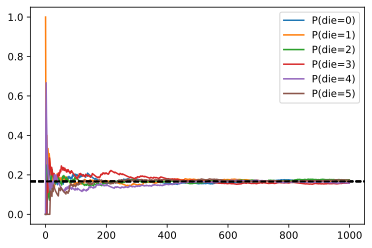

In [12]:
### 각 주사위 눈금이 나올 확률. 샘플링 횟수를 거듭할수록 균일해짐을 알 수 있다.
set_figsize((6, 4))

for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label=("P(die=" + str(i) +")"))
    plt.axhline(y=0.16666, color='black', linestyle='dashed')
    plt.legend();

#### **4.4.2 Dealing with multiple random variables**

- joint distribution

- **conditional probability**

#### **4.4.3 Conditional independence** 

In [ ]:
#### 4.4.3 Conditional independence 

#### **4.4.4 Sampling** 

In [ ]:
#### 4.4.4 Sampling 

In [33]:
for i in range(10):
    print(random.random())

0.4698930345585679
0.11493908056799607
0.6916032150247914
0.06128938585860755
0.9243516946535042
0.6697389845851887
0.32329510934698935
0.39988869871916644
0.2623600913750628
0.3544379158374448


##### **Uniform Distribution**

In [34]:
for i in range(10):
    print(random.randint(1, 100))

28
40
57
88
69
62
73
93
14
86


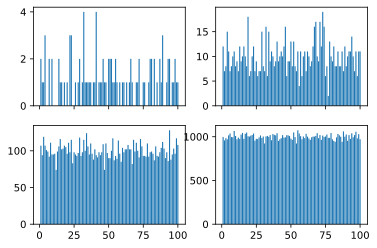

In [35]:
counts = np.zeros(100)
fig, axes = plt.subplots(2, 2, sharex=True)
axes = axes.flatten()

# Mangle subplots such that we can index them in a linear fashion rather than
# a 2D grid
for i in range(1, 100001):
    counts[random.randint(0, 99)] += 1
    
    if i in [100, 1000, 10000, 100000]:
        axes[int(math.log10(i))-2].bar(np.arange(1, 101), counts)

##### **The categorical distribution**

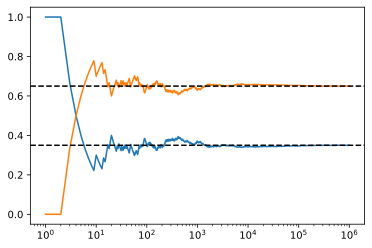

In [37]:
# Number of samples
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n+1)

# Count number of occurrences and divide by the number of total draws
p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.axhline(y=0.35, color='black', linestyle='dashed')
plt.axhline(y=0.65, color='black', linestyle='dashed');

##### **The Normal distribution**

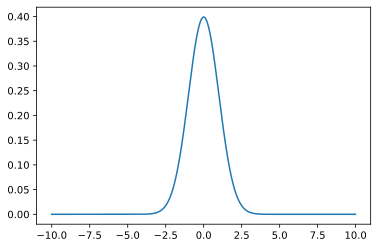

In [38]:
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, p);

mean 0.9, variance 0.49


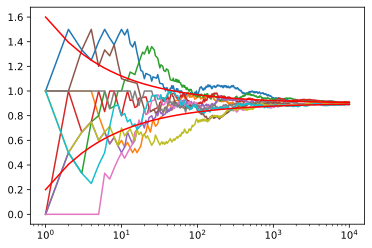

In [39]:
# Generate 10 random sequences of 10,000 uniformly distributed random variables
tmp = np.random.uniform(size=(10000,10))
x = 1.0 * (tmp > 0.3) + 1.0 * (tmp > 0.8)
mean = 1 * 0.5 + 2 * 0.2
variance = 1 * 0.5 + 4 * 0.2 - mean**2
print('mean {}, variance {}'.format(mean, variance))

# Cumulative sum and normalization
y = np.arange(1,10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

for i in range(10):
    plt.semilogx(y,z[:,i])
    
plt.semilogx(y,(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y,-(variance**0.5) * np.power(y,-0.5) + mean,'r');

##### **More distributions**

- ###### **Binomial Distribution**

- ###### **Multinomial Distribution**

- ###### **Poisson Distribution**

- ###### **Beta, Dirichlet, Gamma, and Wishart Distributions**

#### **4.4.5 Summary** 

In [ ]:
#### 4.4.5 Summary 

#### **4.4.6 Exercises**

In [ ]:
#### 4.4.6 Exercises

____